In [63]:
import gym
import os
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch

from stable_baselines3 import A2C, DQN, PPO, DDPG
from stable_baselines3.common import results_plotter
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
from stable_baselines3.common.sb2_compat.rmsprop_tf_like import RMSpropTFLike
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

In [57]:
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

env = gym.make('CartPole-v1')
env = Monitor(env, log_dir)

model = PPO('MlpPolicy', env, verbose=0, policy_kwargs=dict(
    net_arch=[{'pi': [16, 16], 'vf': [16, 16]}], activation_fn=nn.ReLU
    # optimizer_class=RMSpropTFLike, optimizer_kwargs=dict(eps=1e-5)
))
timesteps = 100000
model.learn(total_timesteps=timesteps)

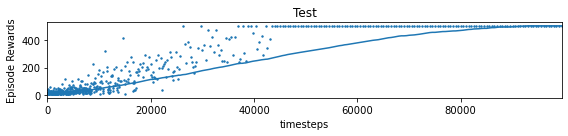

In [58]:
plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "Test")
plt.show()

In [60]:
obs = env.reset()

In [65]:
obs

array([-0.01478117, -0.04631161, -0.00290175,  0.00460493], dtype=float32)

In [66]:
model.policy

ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (shared_net): Sequential()
    (policy_net): Sequential(
      (0): Linear(in_features=4, out_features=16, bias=True)
      (1): ReLU()
      (2): Linear(in_features=16, out_features=16, bias=True)
      (3): ReLU()
    )
    (value_net): Sequential(
      (0): Linear(in_features=4, out_features=16, bias=True)
      (1): ReLU()
      (2): Linear(in_features=16, out_features=16, bias=True)
      (3): ReLU()
    )
  )
  (action_net): Linear(in_features=16, out_features=2, bias=True)
  (value_net): Linear(in_features=16, out_features=1, bias=True)
)

In [70]:
latent_pi, latent_vf = model.policy.mlp_extractor(torch.from_numpy(obs[None]))

In [80]:
model.policy(torch.from_numpy(obs[None]))

(tensor([0]),
 tensor([[100.0166]], grad_fn=<AddmmBackward0>),
 tensor([-0.3765], grad_fn=<SqueezeBackward1>))

In [16]:
4*16 + 16*16 + 16* 2

352

In [52]:
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

env = gym.make('MountainCarContinuous-v0')
env = Monitor(env, log_dir)

n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

# model = PPO('MlpPolicy', env, verbose=0, policy_kwargs=dict(
#     net_arch=[{'pi': [32, 32], 'vf': [32, 32]}],
#     # optimizer_class=RMSpropTFLike, optimizer_kwargs=dict(eps=1e-5)
# ))
model = DDPG("MlpPolicy", env, action_noise=action_noise, verbose=1)
timesteps = 10000
model.learn(total_timesteps=timesteps)

Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -1.74    |
| time/              |          |
|    episodes        | 4        |
|    fps             | 100      |
|    time_elapsed    | 39       |
|    total_timesteps | 3996     |
| train/             |          |
|    actor_loss      | 0.0116   |
|    critic_loss     | 2.89e-08 |
|    learning_rate   | 0.001    |
|    n_updates       | 2997     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -1.36    |
| time/              |          |
|    episodes        | 8        |
|    fps             | 79       |
|    time_elapsed    | 101      |
|    total_timesteps | 7992     |
| train/             |          |
|    actor_loss      | 0.0112   |
|    critic_loss     | 6.6e-07  |
|    learning_rate   | 0.001  

In [53]:
model.policy

TD3Policy(
  (actor): Actor(
    (features_extractor): FlattenExtractor(
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (mu): Sequential(
      (0): Linear(in_features=2, out_features=400, bias=True)
      (1): ReLU()
      (2): Linear(in_features=400, out_features=300, bias=True)
      (3): ReLU()
      (4): Linear(in_features=300, out_features=1, bias=True)
      (5): Tanh()
    )
  )
  (actor_target): Actor(
    (features_extractor): FlattenExtractor(
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (mu): Sequential(
      (0): Linear(in_features=2, out_features=400, bias=True)
      (1): ReLU()
      (2): Linear(in_features=400, out_features=300, bias=True)
      (3): ReLU()
      (4): Linear(in_features=300, out_features=1, bias=True)
      (5): Tanh()
    )
  )
  (critic): ContinuousCritic(
    (features_extractor): FlattenExtractor(
      (flatten): Flatten(start_dim=1, end_dim=-1)
    )
    (qf0): Sequential(
      (0): Linear(in_features=3, out_features

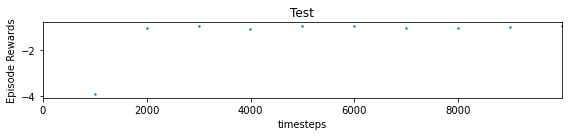

In [54]:
plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "Test")
plt.show()

In [55]:
obs = env.reset()
for i in range(1000):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
       obs = env.reset()
# env.close()